In [1]:
import cv2
import gdown
import numpy as np
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline


In [2]:
gdown.download('https://storage.yandexcloud.net/academy.ai/friends.jpg', None, quiet=True)

'friends.jpg'

In [95]:

# Функция для размытия лица на изображении
def blur_face_old(image, face_coords, eye_coords, face):
    # Создаем маску для лица
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    (x, y, width, height) = face_coords
    #print(mask)
    cv2.ellipse(image, ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, (255, 0, 0), 5)
    face_mask = cv2.ellipse(mask.copy(), ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, 255, -1)
    # #print(mask)
    # print("face_mask", len(np.where(face_mask[..., None] == 255)))

    # Создаем маску для глаз
    #face= cv2.GaussianBlur(face, (101, 101), 0)
    eyes_mask= mask.copy()
    for (x_eye,y_eye,w_eye,h_eye) in eye_coords:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye)+x, int(y_eye + 0.5*h_eye)+y)

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(image, center, radius, color, thickness)
        eyes_mask= cv2.circle(eyes_mask.copy(), center, radius, color=255, thickness=-1)

    # Применяем размытие к изображению
    blurred_image = cv2.GaussianBlur(image.copy(), (101, 101), 0)
    both_mask = cv2.bitwise_xor(face_mask,eyes_mask)
    # Комбинируем оригинальное изображение и размытое изображение с использованием маски
    # result = cv2.bitwise_not(blurred_image, image, mask=mask2)
    result = np.where(both_mask[..., None] == 255, blurred_image, image)
    
    #cv2.ellipse(result, ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, (255, 0, 0), 2)

    return result



In [96]:
import math

def calculate_angle(point1, point2):
    """
    Вычисляет угол наклона линии, соединяющей две точки.
    
    :param point1: Кортеж с координатами первой точки (x1, y1)
    :param point2: Кортеж с координатами второй точки (x2, y2)
    :return: Угол наклона в градусах
    """
    x1, y1 = point1
    x2, y2 = point2
    
    delta_x = x2 - x1
    delta_y = y2 - y1
    
    angle_rad = math.atan2(delta_y, delta_x)
    angle_deg = math.degrees(angle_rad)
    
    return angle_deg

In [97]:

# Функция для размытия лица на изображении
def blur_face(image, face_coords, eye_coords, face):
    # Создаем маску для лица
    mask = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    (x, y, width, height) = face_coords
    #print(mask)
    cv2.ellipse(image, ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, (255, 0, 0), 5)
    face_mask = cv2.ellipse(mask.copy(), ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, 255, -1)
    # #print(mask)
    # print("face_mask", len(np.where(face_mask[..., None] == 255)))

    # Создаем маску для глаз
    #face= cv2.GaussianBlur(face, (101, 101), 0)
    eyes_mask= mask.copy()
    radius=1
    for (x_eye,y_eye,w_eye,h_eye) in eye_coords:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye)+x, int(y_eye + 0.5*h_eye)+y)

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(image, center, radius, color, thickness)
        eyes_mask= cv2.circle(eyes_mask.copy(), center, radius, color=255, thickness=-1)
    


    # Применяем размытие к изображению
    blurred_image = cv2.GaussianBlur(image.copy(), (101, 101), 0)
    both_mask = cv2.bitwise_xor(face_mask,eyes_mask)
    # Комбинируем оригинальное изображение и размытое изображение с использованием маски
    # result = cv2.bitwise_not(blurred_image, image, mask=mask2)
    result = np.where(both_mask[..., None] == 255, blurred_image, image)
    roi_color = result[y:y + height, x:x + width]
    if len(eyes) == 2:
        # Предположим, что глаза обнаружены, и они не перекрываются
        eye1 = eyes[0]
        eye2 = eyes[1]

        # Убедимся, что eye1 находится слева от eye2
        # if eye1[0] > eye2[0]:
        #     eye1, eye2 = eye2, eye1

        # Центры глаз
        eye1_center = (eye1[0] + eye1[2] // 2, eye1[1] + eye1[3] // 2)
        eye2_center = (eye2[0] + eye2[2] // 2, eye2[1] + eye2[3] // 2)
        angle = calculate_angle(eye1_center, eye2_center)
        # Ширина и высота очков
        glasses_width = eye2_center[0] - eye1_center[0]
        glasses_height = int(glasses_width * sunglasses_mask.shape[0] / sunglasses_mask.shape[1])

        # Расположение очков
        x1 = eye1_center[0] - glasses_width // 4
        x2 = eye2_center[0] + glasses_width // 4
        y1 = eye1_center[1] - glasses_height // 2
        y2 = y1 + glasses_height
        print(f"rotate glasses to {angle}")
        glasses_rotate = rotate_glasses(glasses=sunglasses_mask.copy(), angle=-angle)

        # Изменение размера очков
        glasses_resized = cv2.resize(glasses_rotate, (x2 - x1, y2 - y1), interpolation=cv2.INTER_AREA)
        # Наложение очков с учетом альфа-канала
        for i in range(glasses_resized.shape[0]):
            for j in range(glasses_resized.shape[1]):
                #if glasses_resized[i, j, 3] != 0:  # Альфа-канал не прозрачный
                roi_color[y1 + i, x1 + j] = glasses_resized[i, j, :3]
    
    #cv2.ellipse(result, ((x + width // 2), (y + height // 2)), (width // 2, height // 2), 0, 0, 360, (255, 0, 0), 2)

    return result

In [98]:

def rotate_glasses(glasses, angle, scale = 1.0):
    # Получение высоты и ширины изображения
    (h, w) = glasses.shape[:2]
    
    # Определение центра изображения
    center = (w // 2, h // 2)
    
    # Определение угла поворота и масштабирования
    
    
    # Создание матрицы поворота
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Применение поворота
    rotated = cv2.warpAffine(glasses, M, (w, h))
    return rotated


In [99]:
sunglasses_mask = cv2.imread('./sunglasses.png')
h_mask, w_mask = sunglasses_mask.shape[:2]
# Загрузка изображения
img = cv2.imread('./friends.jpg')
# загрузка каскада Хаара для поиска лиц
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")
# выполнение распознавания лиц
img2 = img.copy()
bboxes = classifier_face.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

rotate glasses to 7.800187884181699
rotate glasses to 3.3177811683348435
rotate glasses to 3.1798301198642345
rotate glasses to 17.96913974015702
rotate glasses to 8.569141879837643
rotate glasses to 6.809050179613405


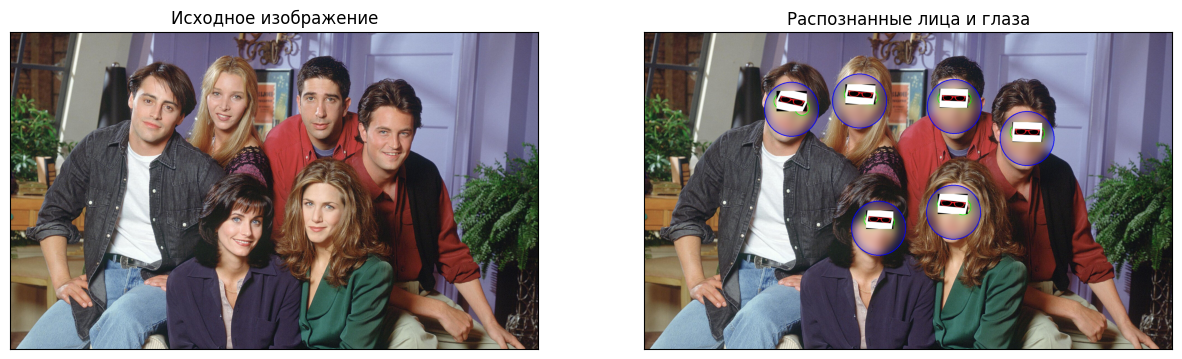

In [100]:

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # формирование координат
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # рисование прямоугольников
    #cv2.rectangle (img2, (x, y), (x2, y2), (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width]  # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face)

    img2 = blur_face(img2, box, eyes, face)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()

In [101]:
eyes

array([[ 46,  44,  42,  42],
       [117,  56,  35,  35]], dtype=int32)

In [239]:
mask = np.zeros((10, 15), dtype=np.uint8)

In [240]:
mask

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [45]:
cv2.ellipse(mask, (4, 4), (4, 3), 0, 0, 360, 255, -1)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,
          0,   0],
       [  0, 255, 255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

In [47]:
result = np.where(mask[..., None] == 255, img2, img2)

ValueError: operands could not be broadcast together with shapes (10,15,1) (1152,1920,3) (1152,1920,3) 